In [17]:
#Load libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

### Load and Preprocess data

In [18]:

# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [19]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))  # Adjust target_size as needed
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(1 if class_name != 'Healthy Fish' else 0)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

        

fish\Bacterial diseases - Aeromoniasis
fish\Bacterial gill disease


fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


In [20]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
labels = to_categorical(labels, len(classes))
print(labels.shape)

(460, 7)


In [21]:
# Split the data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
#x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
#print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 7) 
The shape of test data :(92, 128, 128, 3),(92, 7) 


In [22]:
# Apply data augmentation
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

datagen.fit(x_train)

### Create a Model

In [23]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(rate=0.5),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(rate=0.3),
    Dense(len(classes), activation='sigmoid',kernel_regularizer=l2(0.01))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [24]:
# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 128)      

### Train the model

In [25]:
# Train the model
batch_size = 32
epochs = 10 
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=batch_size, subset='validation'),
          epochs=epochs)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 3.6798 - accuracy: 0.4475 - val_loss: 2.4886 - val_accuracy: 0.7534
Epoch 2/10
10/10 [==============================] - 8s 814ms/step - loss: 2.2142 - accuracy: 0.5661 - val_loss: 1.8303 - val_accuracy: 0.7534
Epoch 3/10
10/10 [==============================] - 8s 817ms/step - loss: 1.6673 - accuracy: 0.5695 - val_loss: 1.3734 - val_accuracy: 0.7534
Epoch 4/10
10/10 [==============================] - 8s 879ms/step - loss: 1.2819 - accuracy: 0.4915 - val_loss: 1.1044 - val_accuracy: 0.7534
Epoch 5/10
10/10 [==============================] - 8s 787ms/step - loss: 1.0813 - accuracy: 0.5220 - val_loss: 0.9333 - val_accuracy: 0.7534
Epoch 6/10
10/10 [==============================] - 9s 928ms/step - loss: 0.9235 - accuracy: 0.5492 - val_loss: 0.8123 - val_accuracy: 0.7534
Epoch 7/10
10/10 [==============================] - 10s 970ms/step - loss: 0.8115 - accuracy: 0.5322 - val_loss: 0.7203 - val_accuracy: 0.7534
Epoch 8

In [26]:
# Train the model
batch_size = 32
epochs = 10
#history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_val, y_val))


### Visualize the model performance

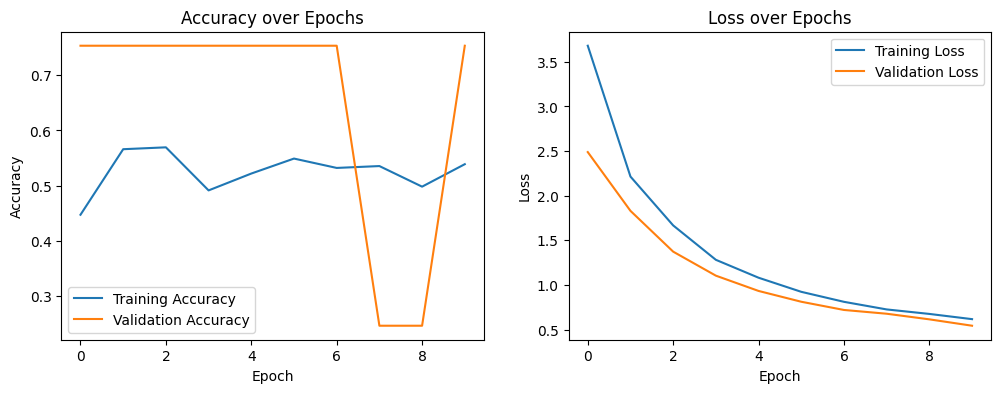

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluate on the test set

In [28]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc :.2f}')
print(f'Test Loss: {test_loss : .2f}')

3/3 [==============================] - 0s 145ms/step - loss: 0.5523 - accuracy: 0.6739
Test Accuracy: 0.67
Test Loss:  0.55


In [30]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

3/3 [==============================] - 0s 135ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.67      1.00      0.81        62

    accuracy                           0.67        92
   macro avg       0.34      0.50      0.40        92
weighted avg       0.45      0.67      0.54        92



c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

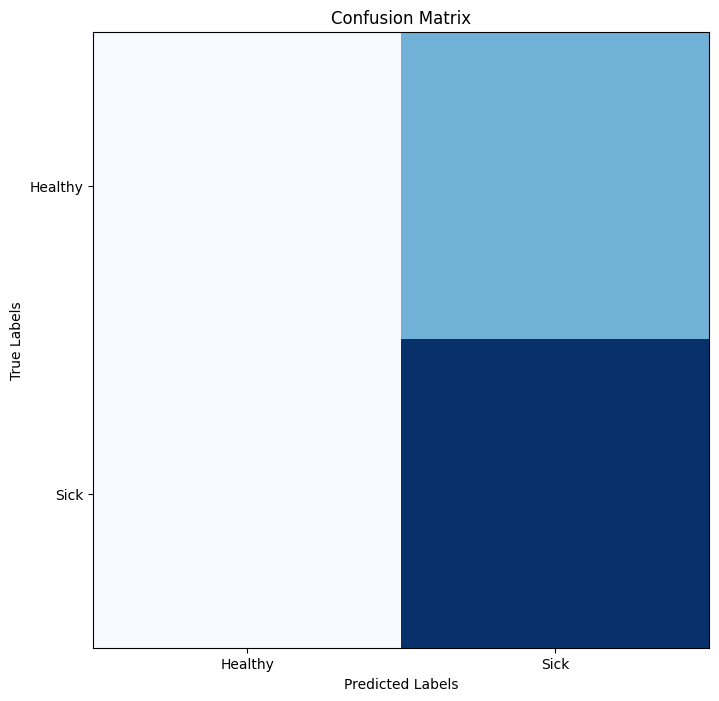

In [36]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()